In [20]:
#
# Purpose is to read in large set of csv downloaded from FINRA, parse into invidual tickers, sort by date and write out into directories.

import pandas as pd
import os
import datetime as dt
date_fmt ='%Y-%m-%d'
import time
import fnmatch
import time
import numpy as np
from matplotlib import pyplot as plt

In [21]:
path = '/home/pookie/git/shorts/shortvolume/symboldata/'
symbol = 'GME'
symbol_dir = symbol + '_data'

In [22]:
working_dir = os.path.join(path, symbol_dir)
print(working_dir)

/home/pookie/git/shorts/shortvolume/symboldata/GME_data


In [23]:
exchanges = ['CNMS', 'FNQC', 'FNSQ', 'FNYX']
postfix = '_data.csv'
mylist = []
for exchange in exchanges:
    file = exchange + postfix
    filename = os.path.join(working_dir, file)
    derp = pd.read_csv(filename)
    mylist.append(derp)

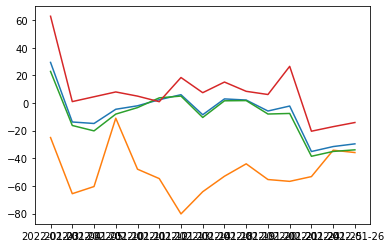

In [37]:
start_date = '2022-01-01'
end_date = '2022-02-01'



for df in mylist:
    #raw_x = df['Date']
    #df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]
    sub_df= df[df.Date.between(start_date, end_date)]
    sub_df_dt = sub_df['Date']
    
    #df_cumsum = sub_df['CumNetShort']
    df_cumsum = sub_df['NetShortPercent']
    plt.plot(sub_df_dt,df_cumsum)


In [39]:
mylist[0]

,Unnamed: 0,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market,NetShort,NetShortPercent,CumNetShort
0,3033,2017-12-29,GME,394889,6072,737033,"Q,N",-64889,-8.804083,-64889
1,2974,2018-08-01,GME,237675,1000,467132,"Q,N",-10218,-2.187390,-75107
2,2990,2018-08-02,GME,241347,300,402459,"Q,N",-80835,-20.085276,-155942
3,2993,2018-08-03,GME,725987,0,1040830,"Q,N",-411144,-39.501552,-567086
4,2980,2018-08-06,GME,508260,0,776460,"Q,N",-240060,-30.917240,-807146
...,...,...,...,...,...,...,...,...,...,...
873,3978,2022-01-20,GME,585943,100,1107650,"B,Q,N",-64436,-5.817361,-119282464
874,4049,2022-01-21,GME,1113725,8909,2196576,"B,Q,N",-48692,-2.216723,-119331156
875,4100,2022-01-24,GME,1504081,35334,2278511,"B,Q,N",-800319,-35.124649,-120131475
876,4052,2022-01-25,GME,867519,20247,1349879,"B,Q,N",-425653,-31.532678,-120557128
